### KNN Performance Evaluation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [7]:
#Load the dataset
iris = load_iris()

In [8]:
X = iris.data
y = iris.target

In [9]:
#Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [21]:
model = KNeighborsClassifier(n_neighbors = 5) #KNN model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [18]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[19  0  0]
 [ 0  8  5]
 [ 0  4  9]]


In [19]:
#Accuracy, Precision, Recall, and F-1 Score

print(classification_report(y_test, y_pred, target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.67      0.62      0.64        13
   virginica       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



### ROC and AUC 

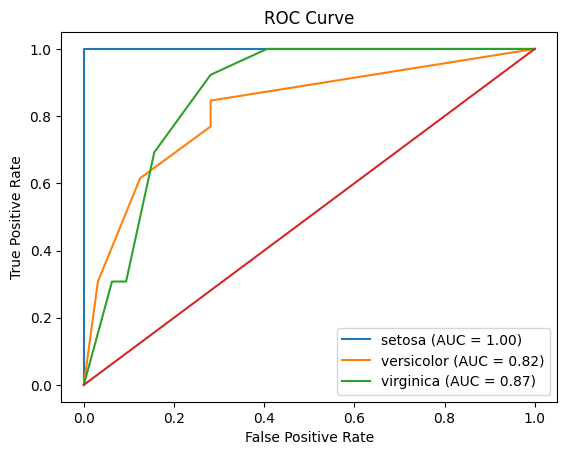

In [26]:
#Binarize the labels for ROC
y_test_binary = label_binarize(y_test, classes = [0,1,2])
n_classes = y_test_binary.shape[1]
fpr = {} #False Positive Rates for each class
tpr = {} #True Positive Rates for each class
roc_auc = {} #AUC Values for each class

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            label = f"{iris.target_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()